<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import builtins as bt
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN

#FUNZIONI

In [2]:
#FUNZIONE CHE GENERA COORDINATE CON UNA POIS LAMBA * T^2

def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  #print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y, N

In [3]:
#FUNZIONE CHE CREA CLUSTERS
def clusterizza_dbscan(coordinates_x, coordinates_y, eps=1, min_samples=1):
# Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a list to store clusters (indices of points in each cluster)
  clusters = []
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Find all points with the same label (belonging to the same cluster)
    cluster_indices = [j for j, l in enumerate(cluster_labels) if l == label]
    clusters.append(cluster_indices)

  return clusters

In [4]:
def remove_duplicates(clusters_with_doubles):
  for i in range(len(clusters_with_doubles)):
    for j in range(i+1, len(clusters_with_doubles)):
      if clusters_with_doubles[i] == clusters_with_doubles[j]:
        clusters_with_doubles[j] = "duplicato"
  clusters = []
  for element in clusters_with_doubles:
    if element != "duplicato":
      clusters.append(element)
  return clusters

In [5]:
#FUNZIONE PER SIZE DEL CLUSTER PIU GRANDE
def largest_cluster_size (clusters):
  max_cluster_size = 0
  for cluster in clusters:
    if len(cluster) > max_cluster_size:
      max_cluster_size = len(cluster)
  return max_cluster_size

In [6]:
#FUNZIONE CHE RESTITUISCE IL NUMERO DI CLUSTERS
def number_of_clusters(clusters):
  return len(clusters)

#SVOLGIMENTO

In [7]:
#coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

In [8]:
#clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
#clusters = remove_duplicates(clusters_with_duplicates)
#print(clusters)

In [9]:
#largest_cluster_size(clusters)

In [10]:
#number_of_clusters(clusters)

#ITERAZIONI

##LAMBDA = ?

In [11]:
#T = int(bt.input('Inserisci la dimenzione massima del dominio(max suggested = 40): '))
#l = float(bt.input('Inserisci il valore di  λ (max suggested = 2): '))
#M = int(bt.input('Inserisci il nummero iterazioni M: '))


T = 20 #MAX DOMINIO
l = 1 #LAMBDA
M = 10 #NUMERO ITERAZIONI

In [12]:
#ITERAZIONI E CREAZIONE DFs
largest_cluster_size_df_0 = []
number_of_clusters_df_0 = []
number_of_ponits_df_0 = []
for i in range(M):
  coordinates_x, coordinates_y, N = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  #print ('Iteration: ', i+1, '\nNumber of points: ', N, '\nNumber of clusters: ',  number_of_clusters(clusters), '\nLargest cluster size: ', largest_cluster_size(clusters), '\n')
  largest_cluster_size_df_0.append(largest_cluster_size(clusters))
  number_of_clusters_df_0.append(number_of_clusters(clusters))
  number_of_ponits_df_0.append(N)

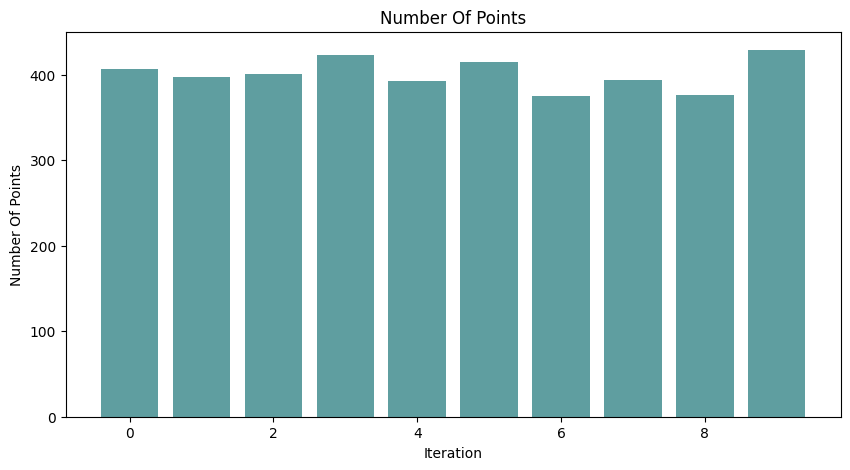

In [13]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_ponits_df_0, color = 'cadetblue')
plt.title('Number Of Points')
plt.xlabel('Iteration')
plt.ylabel('Number Of Points')

plt.show()

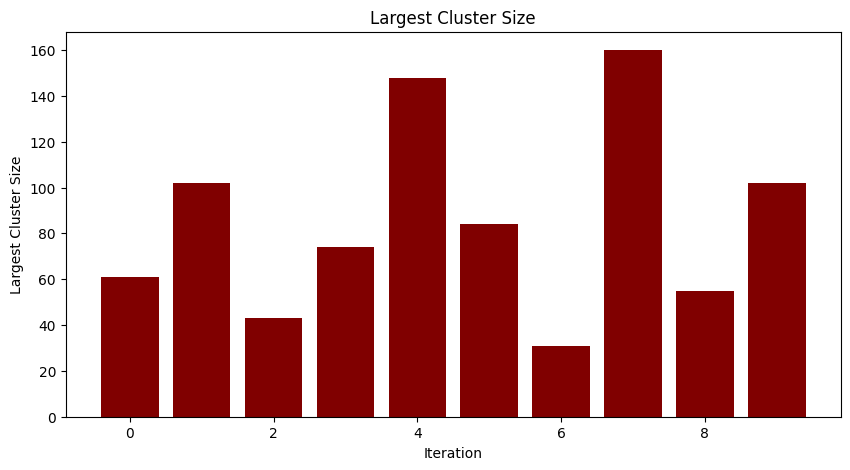

In [14]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), largest_cluster_size_df_0, color = 'maroon')
plt.title('Largest Cluster Size')
plt.xlabel('Iteration')
plt.ylabel('Largest Cluster Size')
plt.show()

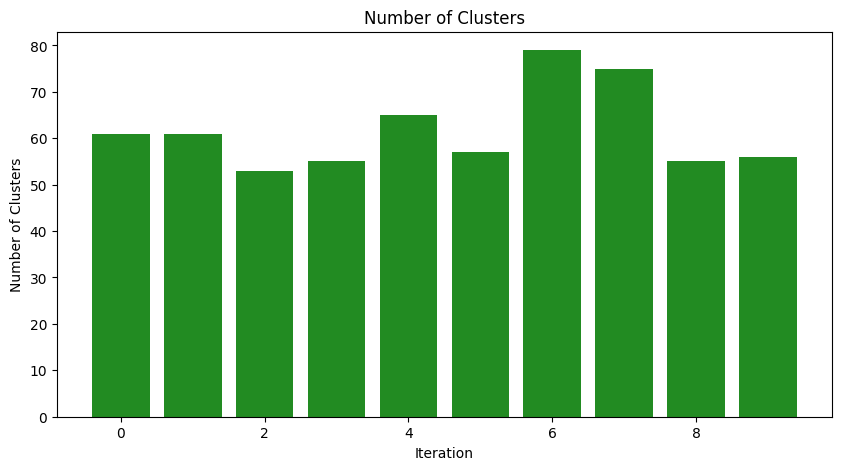

In [15]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_clusters_df_0, color = 'forestgreen')
plt.title('Number of Clusters')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')

plt.show()

In [16]:
clusters_info_0 = pd.Series(largest_cluster_size_df_0, name = 'largest_cluster_size')
clusters_info_0 = pd.concat([pd.Series(number_of_ponits_df_0, name = 'number_of_ponits'), pd.Series(number_of_clusters_df_0, name = 'number_of_clusters'), clusters_info_0], axis = 1)

clusters_info_0.describe()

,number_of_ponits,number_of_clusters,largest_cluster_size
count,10.000000,10.000000,10.000000
mean,401.100000,61.700000,86.000000
std,17.891339,8.870049,42.739521
min,375.000000,53.000000,31.000000
25%,393.250000,55.250000,56.500000
50%,399.000000,59.000000,79.000000
75%,413.000000,64.000000,102.000000
max,429.000000,79.000000,160.000000


In [17]:
mean_largest_cluster_size_0 = np.mean(largest_cluster_size_df_0)
mean_number_of_clusters_0 = np.mean(number_of_clusters_df_0)
print("Mean of the largest cluster's size = ", mean_largest_cluster_size_0, "\nMean of the number of clusters = ", mean_number_of_clusters_0)

Mean of the largest cluster's size =  86.0 
Mean of the number of clusters =  61.7


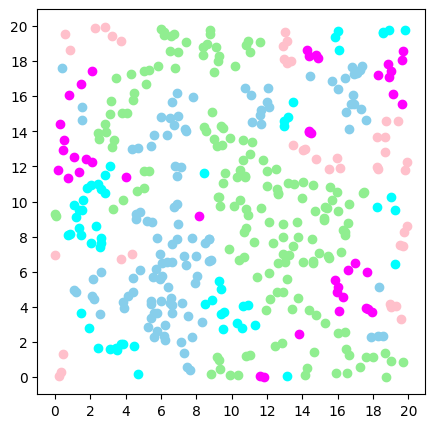

In [18]:
# Create a list to store colors for each cluster
cluster_colors = ['cyan', 'magenta', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (5, 5))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)])
plt.xticks(range(0, T + 1, int(T/10)))
plt.yticks(range(0, T + 1, int(T/10)))
plt.show()

##PUNTO 1

###LAMBDA = 4.512/4PI

In [19]:
T = 20 #MAX DOMINIO
l = 4.512/(4*math.pi) #LAMBDA
M = 200 #NUMERO ITERAZIONI

In [20]:
largest_cluster_size_df_1 = []
number_of_clusters_df_1 = []
number_of_ponits_df_1 = []

for i in range(M):
  coordinates_x, coordinates_y, N = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  #print ('Iteration: ', i+1, '\nNumber of points: ', N, '\nNumber of clusters: ',  number_of_clusters(clusters), '\nLargest cluster size: ', largest_cluster_size(clusters), '\n')
  largest_cluster_size_df_1.append(largest_cluster_size(clusters))
  number_of_clusters_df_1.append(number_of_clusters(clusters))
  number_of_ponits_df_1.append(N)


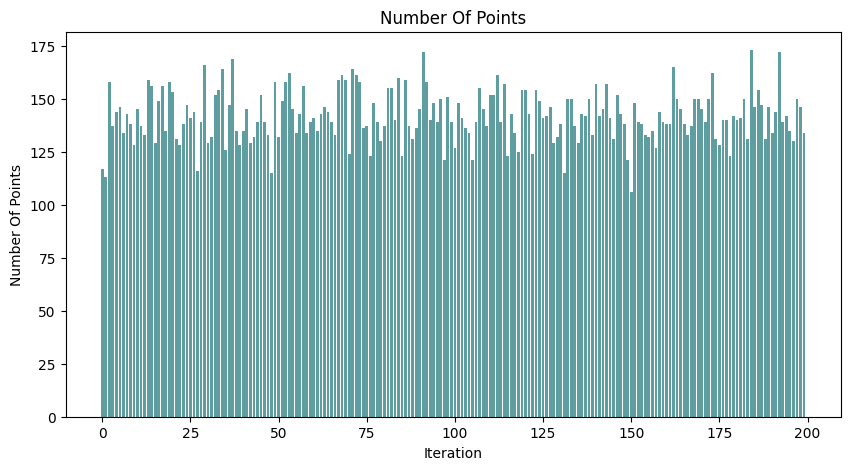

In [21]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_ponits_df_1, color = 'cadetblue')
plt.title('Number Of Points')
plt.xlabel('Iteration')
plt.ylabel('Number Of Points')

plt.show()

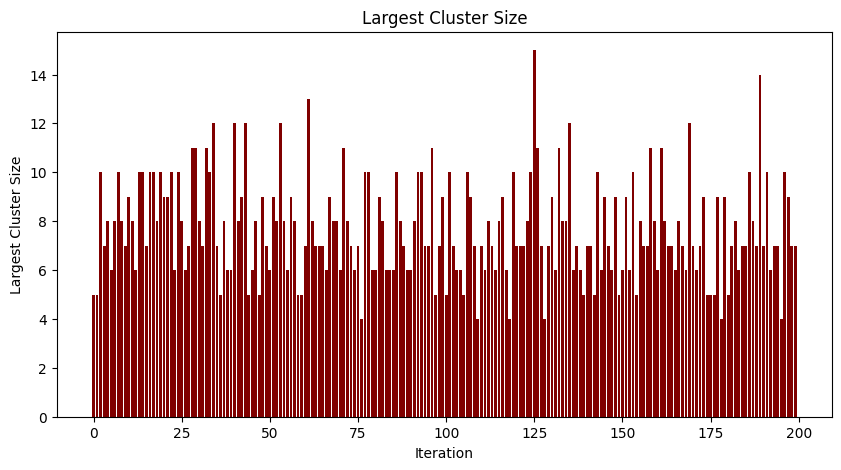

In [22]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), largest_cluster_size_df_1, color = 'maroon')
plt.title('Largest Cluster Size')
plt.xlabel('Iteration')
plt.ylabel('Largest Cluster Size')
plt.show()

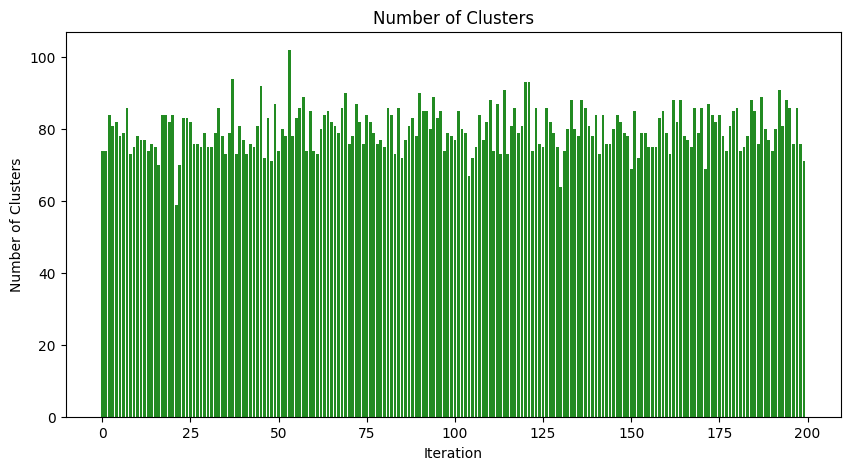

In [23]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_clusters_df_1, color = 'forestgreen')
plt.title('Number of Clusters')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')

plt.show()

In [24]:
clusters_info_1 = pd.Series(largest_cluster_size_df_1, name = 'largest_cluster_size')
clusters_info_1 = pd.concat([pd.Series(number_of_ponits_df_1, name = 'number_of_ponits'), pd.Series(number_of_clusters_df_1, name = 'number_of_clusters'), clusters_info_1], axis = 1)

clusters_info_1.describe()

,number_of_ponits,number_of_clusters,largest_cluster_size
count,200.000000,200.000000,200.000000
mean,141.900000,79.925000,7.695000
std,12.096347,5.941031,2.050119
min,106.000000,59.000000,4.000000
25%,134.000000,75.000000,6.000000
50%,141.000000,79.000000,7.000000
75%,150.000000,84.000000,9.000000
max,173.000000,102.000000,15.000000


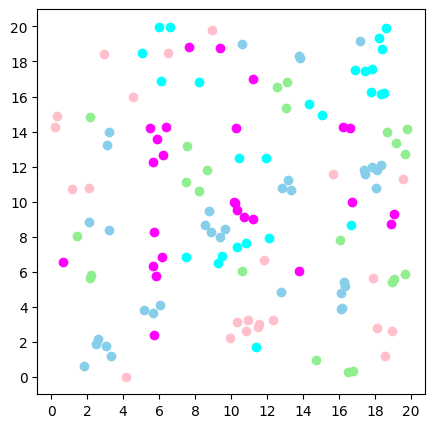

In [25]:
# Create a list to store colors for each cluster
cluster_colors = ['cyan', 'magenta', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (5, 5))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)])
plt.xticks(range(0, T + 1, int(T/10)))
plt.yticks(range(0, T + 1, int(T/10)))
plt.show()

###LAMBDA > 4.512/4PI

In [26]:
T = 20 #MAX DOMINIO
l = 4.512/(2*math.pi) #LAMBDA
M = 200 #NUMERO ITERAZIONI

In [27]:
largest_cluster_size_df_2 = []
number_of_clusters_df_2 = []
number_of_ponits_df_2 = []

for i in range(M):
  coordinates_x, coordinates_y, N = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  #print ('Iteration: ', i+1, '\nNumber of points: ', N, '\nNumber of clusters: ',  number_of_clusters(clusters), '\nLargest cluster size: ', largest_cluster_size(clusters), '\n')
  largest_cluster_size_df_2.append(largest_cluster_size(clusters))
  number_of_clusters_df_2.append(number_of_clusters(clusters))
  number_of_ponits_df_2.append(N)


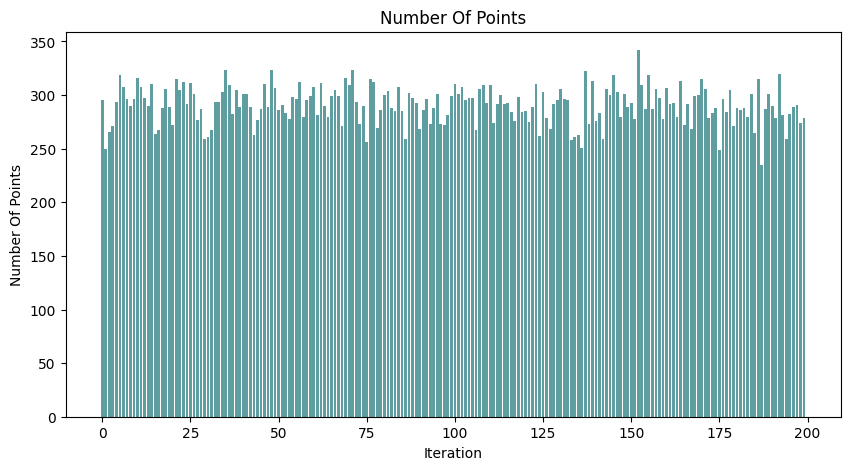

In [28]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_ponits_df_2, color = 'cadetblue')
plt.title('Number Of Points')
plt.xlabel('Iteration')
plt.ylabel('Number Of Points')

plt.show()

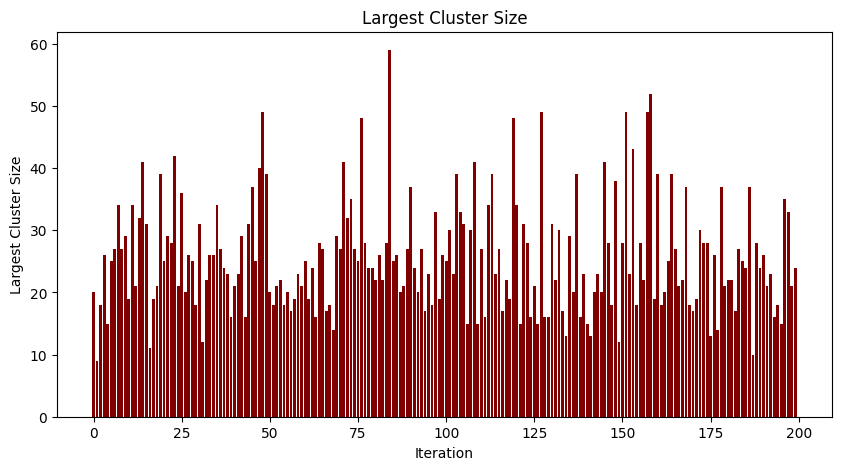

In [29]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), largest_cluster_size_df_2, color = 'maroon')
plt.title('Largest Cluster Size')
plt.xlabel('Iteration')
plt.ylabel('Largest Cluster Size')

plt.show()

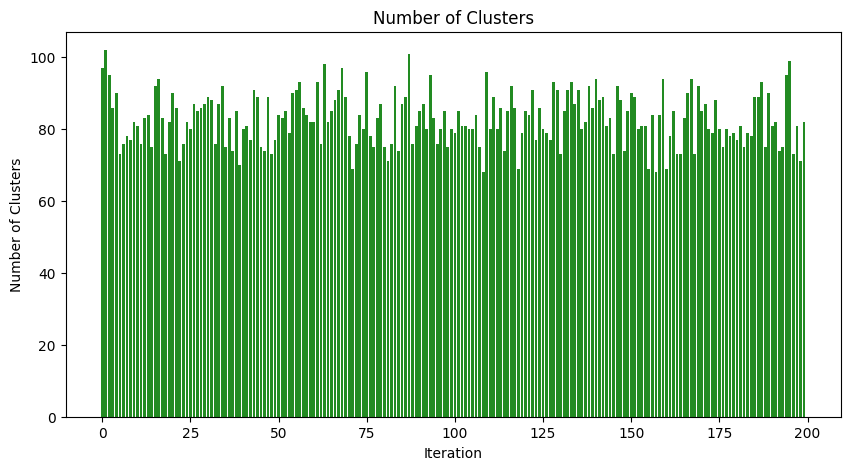

In [30]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_clusters_df_2, color = 'forestgreen')
plt.title('Number of Clusters')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')

plt.show()

In [31]:
clusters_info_2 = pd.Series(largest_cluster_size_df_2, name = 'largest_cluster_size')
clusters_info_2 = pd.concat([pd.Series(number_of_ponits_df_2, name = 'number_of_ponits'), pd.Series(number_of_clusters_df_2, name = 'number_of_clusters'), clusters_info_2], axis = 1)

clusters_info_2.describe()

,number_of_ponits,number_of_clusters,largest_cluster_size
count,200.000000,200.00000,200.000000
mean,290.815000,82.92500,25.635000
std,17.233856,7.23124,8.919054
min,235.000000,68.00000,9.000000
25%,280.000000,77.00000,19.000000
50%,292.000000,82.50000,24.000000
75%,303.000000,88.25000,30.000000
max,342.000000,102.00000,59.000000


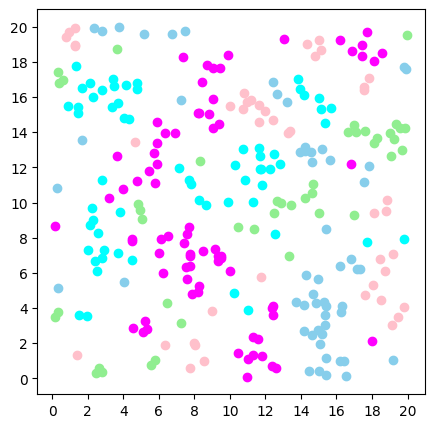

In [32]:
# Create a list to store colors for each cluster
cluster_colors = ['cyan', 'magenta', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (5, 5))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)])
plt.xticks(range(0, T + 1, int(T/10)))
plt.yticks(range(0, T + 1, int(T/10)))
plt.show()

###LAMBDA < 4.512/4PI

In [33]:
T = 20 #MAX DOMINIO
l = 4.512/(8*math.pi) #LAMBDA
M = 200 #NUMERO ITERAZIONI

In [34]:
largest_cluster_size_df_3 = []
number_of_clusters_df_3 = []
number_of_ponits_df_3 = []

for i in range(M):
  coordinates_x, coordinates_y, N = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  #print ('Iteration: ', i+1, '\nNumber of points: ', N, '\nNumber of clusters: ',  number_of_clusters(clusters), '\nLargest cluster size: ', largest_cluster_size(clusters), '\n')
  largest_cluster_size_df_3.append(largest_cluster_size(clusters))
  number_of_clusters_df_3.append(number_of_clusters(clusters))
  number_of_ponits_df_3.append(N)


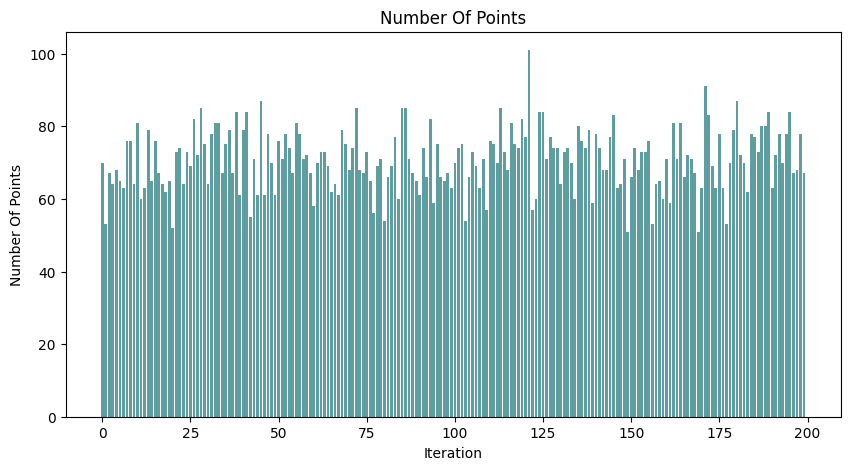

In [35]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_ponits_df_3, color = 'cadetblue')
plt.title('Number Of Points')
plt.xlabel('Iteration')
plt.ylabel('Number Of Points')

plt.show()

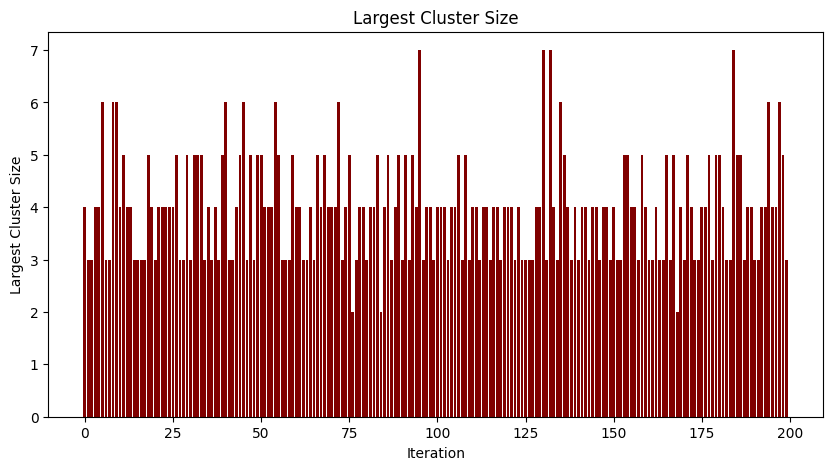

In [36]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), largest_cluster_size_df_3, color = 'maroon')
plt.title('Largest Cluster Size')
plt.xlabel('Iteration')
plt.ylabel('Largest Cluster Size')

plt.show()

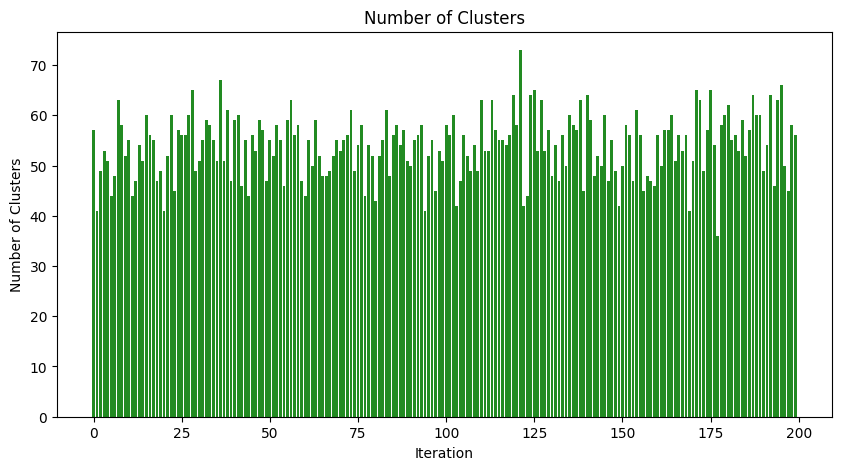

In [37]:
plt.figure(figsize = (10, 5))
plt.bar(range(M), number_of_clusters_df_3, color = 'forestgreen')
plt.title('Number of Clusters')
plt.xlabel('Iteration')
plt.ylabel('Number of Clusters')

plt.show()

In [38]:
clusters_info_3 = pd.Series(largest_cluster_size_df_3, name = 'largest_cluster_size')
clusters_info_3 = pd.concat([pd.Series(number_of_ponits_df_3, name = 'number_of_ponits'), pd.Series(number_of_clusters_df_3, name = 'number_of_clusters'), clusters_info_3], axis = 1)

clusters_info_3.describe()

,number_of_ponits,number_of_clusters,largest_cluster_size
count,200.000000,200.000000,200.000000
mean,70.805000,53.920000,3.970000
std,8.459004,6.175295,0.986899
min,51.000000,36.000000,2.000000
25%,65.000000,49.000000,3.000000
50%,71.000000,55.000000,4.000000
75%,77.000000,58.000000,5.000000
max,101.000000,73.000000,7.000000


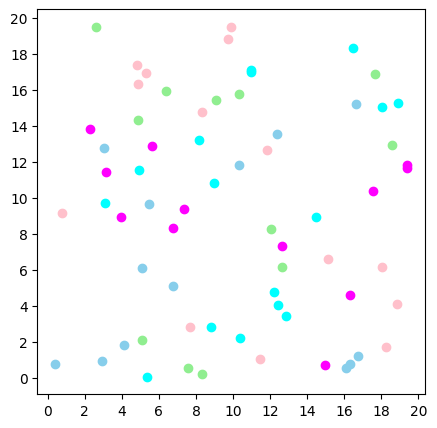

In [39]:
# Create a list to store colors for each cluster
cluster_colors = ['cyan', 'magenta', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (5, 5))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)])
plt.xticks(range(0, T + 1, int(T/10)))
plt.yticks(range(0, T + 1, int(T/10)))
plt.show()

###CONFRONTO

In [49]:
confronta_largest_cluster_size_serie = pd.concat([pd.Series(largest_cluster_size_df_1, name = 'largest_cluster_size_df_λ=λc'), pd.Series(largest_cluster_size_df_2, name = 'largest_cluster_size_df_λ>λc'), pd.Series(largest_cluster_size_df_3, name = 'largest_cluster_size_df_λ<λc'), ], axis = 1)
confronta_largest_cluster_size_array = [np.mean(largest_cluster_size_df_1), np.mean(largest_cluster_size_df_2), np.mean(largest_cluster_size_df_3)]

In [50]:
confronta_largest_cluster_size_serie.describe()

,largest_cluster_size_df_λ=λc,largest_cluster_size_df_λ>λc,largest_cluster_size_df_λ<λc
count,200.000000,200.000000,200.000000
mean,7.695000,25.635000,3.970000
std,2.050119,8.919054,0.986899
min,4.000000,9.000000,2.000000
25%,6.000000,19.000000,3.000000
50%,7.000000,24.000000,4.000000
75%,9.000000,30.000000,5.000000
max,15.000000,59.000000,7.000000


Text(0.5, 1.0, 'Largest Cluster Size')

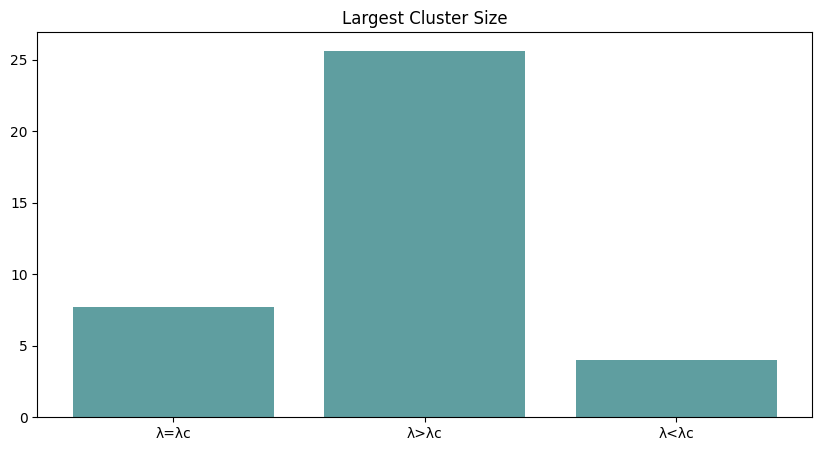

In [53]:
plt.figure(figsize = (10, 5))
plt.bar(['λ=λc', 'λ>λc', 'λ<λc'], confronta_largest_cluster_size_array, color = 'cadetblue')
plt.title('Largest Cluster Size')